In [63]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [121]:
# Read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [122]:
ball_positions = [x.get(1,[]) for x in ball_positions]

df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

# Convert all values to float
df_ball_positions = df_ball_positions.apply(pd.to_numeric, errors='coerce')

# Interpolation of missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [123]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

In [124]:
df_ball_positions['mid_y_rolling_mean']


0      261.505814
1      261.505814
2      261.505814
3      261.505814
4      261.505814
          ...    
800    828.860992
801    833.761334
802    837.251868
803    839.363922
804    839.976355
Name: mid_y_rolling_mean, Length: 805, dtype: float64

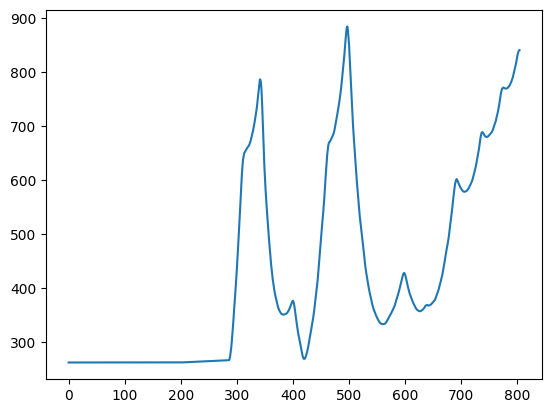

In [125]:
# Plotting the rolling mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])


In [126]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
df_ball_positions['delta_y_smooth'] = df_ball_positions['delta_y'].rolling(window=3, min_periods=1).mean()
# df_ball_positions['mid_x'] = (df_ball_positions['x1'] + df_ball_positions['x2']) / 2
# df_ball_positions['mid_x_rolling_mean'] = df_ball_positions['mid_x'].rolling(window=5, min_periods=1).mean()
# df_ball_positions['delta_x'] = df_ball_positions['mid_x_rolling_mean'].diff()
# df_ball_positions ['delta_x_smooth'] = df_ball_positions['delta_x'].rolling(window=3, min_periods=1).mean()
# df_ball_positions['ball_hit'] = (
#     (df_ball_positions['delta_y_smooth'].abs() > 1.0) |
#     (df_ball_positions['delta_x_smooth'].abs() > 2.0)
# ) & (df_ball_positions['sign_change'] > 1.5)


# df_ball_positions[df_ball_positions['ball_hit'] == 1]

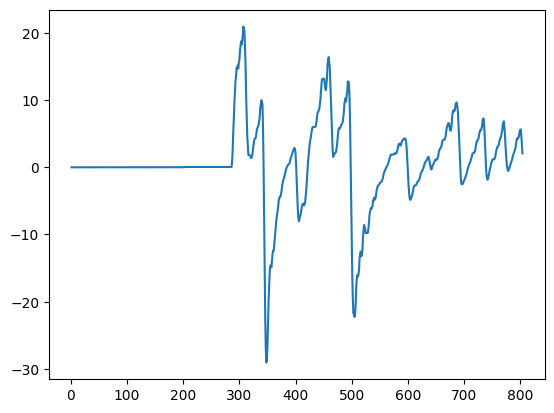

In [127]:
plt.plot(df_ball_positions['delta_y_smooth'])

In [128]:
df_ball_positions['ball_hit'] = 0

In [135]:
min_change_frames = 25

for i in range(1, len(df_ball_positions) - int(min_change_frames*1.2)):
    negative_change = df_ball_positions['delta_y_smooth'].iloc[i] > 0 and df_ball_positions['delta_y_smooth'].iloc[i+1]
    positive_change = df_ball_positions['delta_y_smooth'].iloc[i] < 0 and df_ball_positions['delta_y_smooth'].iloc[i+1]
    
    if negative_change or positive_change:
        change_count = 0
        for change_frame in range(i+1, i+int(min_change_frames*1.2)):
            negative_position_change_following_frame = df_ball_positions['delta_y_smooth'].iloc[i] >0 and df_ball_positions['delta_y_smooth'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y_smooth'].iloc[i] <0 and df_ball_positions['delta_y_smooth'].iloc[change_frame] >0
            
            if negative_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>min_change_frames-1:
            df_ball_positions.loc[i, 'ball_hit'] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()
print(frame_nums_with_ball_hits)

[338, 339, 340, 341, 342, 343, 416, 417, 418, 419, 420, 421, 493, 494, 495, 496, 497, 498, 556, 557, 558, 559, 560, 561, 595, 596, 597, 598, 599, 626, 627, 628, 641, 642, 643, 702, 703, 704, 705, 706, 707, 741, 742, 743, 744, 745, 746]


In [134]:
df_ball_positions[df_ball_positions['ball_hit'] == 1]


,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,delta_y_smooth,ball_hit,group_id,ball_hit_filtered
338,1629.681152,756.398987,1664.171631,789.484680,772.941833,757.504681,9.037982,9.330017,1,1,0
339,1653.298096,770.691284,1686.376465,801.489624,786.090454,767.540088,10.035406,9.984802,1,2,0
340,1669.760376,780.568420,1705.527466,814.451355,797.509888,777.675208,10.135120,9.736169,1,2,0
341,1679.363892,780.906921,1717.839478,818.117065,799.511993,785.795660,8.120453,9.430326,1,2,0
342,1645.074023,750.491833,1686.395898,789.243359,769.867596,785.184353,-0.611307,5.881422,1,2,0
343,1610.784155,720.076746,1654.952319,760.369653,740.223199,778.640626,-6.543727,0.321806,1,2,1
416,837.828735,261.473083,856.667725,282.449921,271.961502,278.891537,-4.853778,-5.477375,1,3,0
417,835.478210,257.980316,853.574341,276.424896,267.202606,274.360880,-4.530658,-5.254657,1,4,0
418,837.404236,257.194336,854.763092,275.199158,266.196747,271.046567,-3.314313,-4.232916,1,4,0
419,839.330261,256.408356,855.951843,273.973419,265.190887,268.505820,-2.540747,-3.461906,1,4,0


In [132]:

df_ball_positions['group_id'] = (df_ball_positions['ball_hit'] != df_ball_positions['ball_hit'].shift()).cumsum()

last_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].groupby('group_id').tail(1)

df_ball_positions['ball_hit_filtered'] = 0
df_ball_positions.loc[last_hits.index, 'ball_hit_filtered'] = 1

# Implemented in BallTracker class
# net_y_position = (court_keypoints[13] + court_keypoints[15]) / 2  # y6 + y7

# df_ball_positions['ball_side'] = df_ball_positions['mid_y'] > net_y_position

filtered_hits = df_ball_positions[df_ball_positions['ball_hit_filtered'] == 1]

false_hits_indices = []

for i in range(len(filtered_hits) - 1):
    current_idx = filtered_hits.index[i]
    next_idx = filtered_hits.index[i + 1]

    current_side = df_ball_positions.loc[current_idx, 'ball_side']
    next_side = df_ball_positions.loc[next_idx, 'ball_side']

    if current_side == next_side:
        false_hits_indices.append(current_idx)

df_ball_positions.loc[false_hits_indices, 'ball_hit_filtered'] = 0


df_ball_positions[df_ball_positions['ball_hit_filtered'] == 1]



KeyError: 'ball_side'